Cambiare optimazer e vedere che succede 
Con adagrad la funzione di loss diminuisce e quella di accuracy cresce rispetto a quelle con SPG. Epoche fatte 10. 
In più aumenta la capacità predittiva, il 5 viene riconosciuto in questo caso. 
Con l'altro la funzione di loss e accurancy è ancora migliore ma a un certo punto sale si più e quindi overfitting?

In [69]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D


## Exercise 12.01

In this exercise the goal is to watch how the performance of the model change with respect to the different optimizer. I chose to increase the number of epochs to $10$ to get better results. 


In [126]:
def train_test():
    seed=0
    np.random.seed(seed) # fix random seed
    tf.random.set_seed(seed)

# input image dimensions
    img_rows, img_cols = 28, 28 # number of pixels 
# output
    num_classes = 10 # 10 digits

# the data, split between train and test sets (dataset fornito direttamente di default)
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
    X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

# rescale data in interval [0,1]
    X_train /= 255
    X_test /= 255

    Y_train = keras.utils.to_categorical(Y_train, num_classes)
    Y_test = keras.utils.to_categorical(Y_test, num_classes)
    return

In [127]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [128]:
def compile_model(opt):
        # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                       optimizer= opt, metrics=['accuracy'])
    return model

Model compiled successfully and ready to be trained.
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7279 - accuracy: 0.7884 - val_loss: 0.3028 - val_accuracy: 0.9175
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8940 - val_loss: 0.2341 - val_accuracy: 0.9321
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.9158 - val_loss: 0.1969 - val_accuracy: 0.9420
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - accuracy: 0.9276 - val_loss: 0.1722 - val_accuracy: 0.9477
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9502


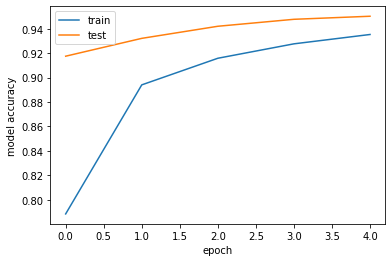

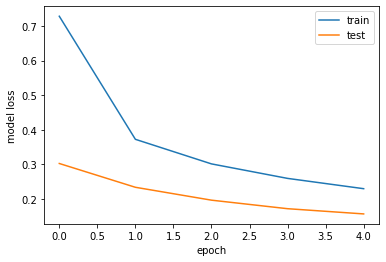

INFO:tensorflow:Assets written to: Saved/sgd/assets
Model compiled successfully and ready to be trained.
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2809 - accuracy: 0.9178 - val_loss: 0.1144 - val_accuracy: 0.9634
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1238 - accuracy: 0.9640 - val_loss: 0.0930 - val_accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9746 - val_loss: 0.0823 - val_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0766 - val_accuracy: 0.9767
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9780


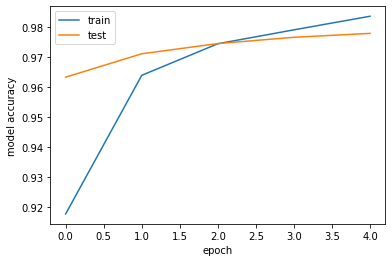

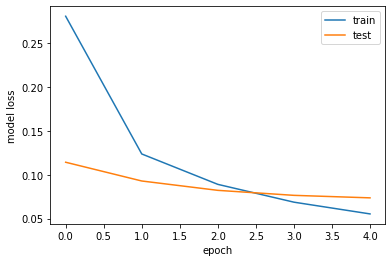

INFO:tensorflow:Assets written to: Saved/adam/assets
Model compiled successfully and ready to be trained.
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6456 - accuracy: 0.8192 - val_loss: 0.3307 - val_accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4329 - accuracy: 0.8783 - val_loss: 0.2817 - val_accuracy: 0.9231
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3817 - accuracy: 0.8950 - val_loss: 0.2562 - val_accuracy: 0.9284
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3515 - accuracy: 0.9014 - val_loss: 0.2398 - val_accuracy: 0.9319
Epoch 5/5
313/313 [==============================] - 0s 829us/step - loss: 0.2288 - accuracy: 0.9347


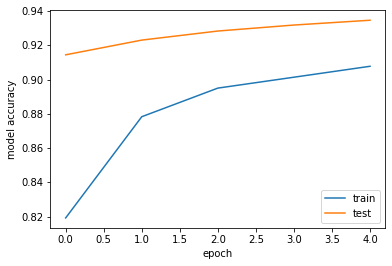

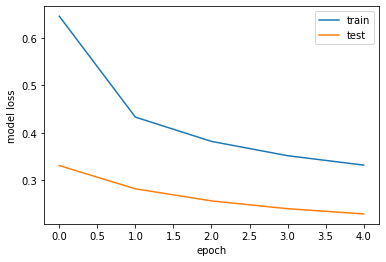

INFO:tensorflow:Assets written to: Saved/adagrad/assets
Model compiled successfully and ready to be trained.
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2764 - accuracy: 0.1592 - val_loss: 2.1189 - val_accuracy: 0.3205
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0849 - accuracy: 0.2893 - val_loss: 1.9402 - val_accuracy: 0.5320
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9210 - accuracy: 0.4063 - val_loss: 1.7687 - val_accuracy: 0.6518
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7659 - accuracy: 0.4970 - val_loss: 1.6017 - val_accuracy: 0.7170
Epoch 5/5
313/313 [==============================] - 0s 902us/step - loss: 1.4465 - accuracy: 0.7536


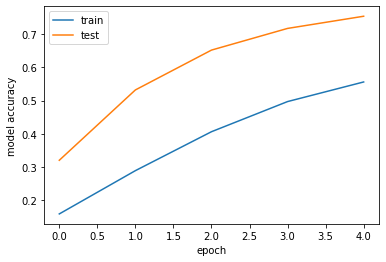

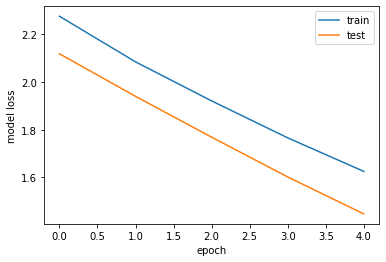

INFO:tensorflow:Assets written to: Saved/adadelta/assets
Model compiled successfully and ready to be trained.
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2809 - accuracy: 0.9196 - val_loss: 0.1375 - val_accuracy: 0.9622
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1558 - accuracy: 0.9606 - val_loss: 0.1319 - val_accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1456 - accuracy: 0.9678 - val_loss: 0.1418 - val_accuracy: 0.9694
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1487 - accuracy: 0.9702 - val_loss: 0.1461 - val_accuracy: 0.9741
Epoch 5/5
313/313 [==============================] - 0s 835us/step - loss: 0.1792 - accuracy: 0.9712


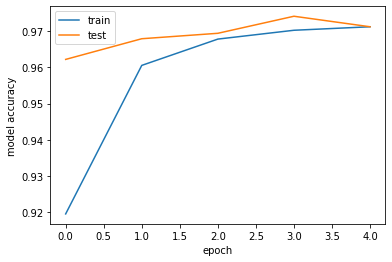

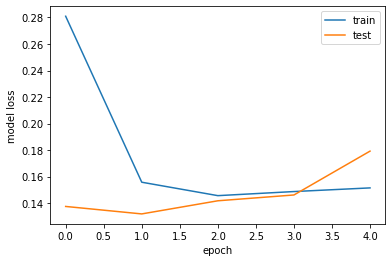

INFO:tensorflow:Assets written to: Saved/rmsprop/assets


In [133]:
opt = ['sgd','adam','adagrad','adadelta','rmsprop']
for i in range(5):

    train_test()
    X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    print('Model compiled successfully and ready to be trained.')
# training parameters
    batch_size = 32
    epochs = 5

# create the deep neural net
    model_DNN = compile_model(opt[i])


# train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
#loss del test più bassa del training e accurancy del test più alta del training
#per le cose che dicevamo prima (?) ma soprattutto è dovuto al fatto che il dropout non viene attivato in fase del test 
#ah sì perchè non è così ottimizzato ? tipo quello del sito
#perchè l'importante per il test è vedere che la loss sta scendendo e che non stiamo overfittando
# summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

    path = 'Optimizer'
    func_loss = np.column_stack((history.history['loss'],history.history['val_loss']))
    func_acc = np.column_stack((history.history['accuracy'],history.history['val_accuracy']))
    np.savetxt(os.path.join(path, f'loss_{opt[i]}.dat'),func_loss)
    np.savetxt(os.path.join(path, f'accuracy_{opt[i]}.dat'),func_acc)
    save_model_path=f'Saved/{opt[i]}'
    model_DNN.save(filepath=save_model_path, include_optimizer=True)

From the plot of the accuracy and loss function in the different cases we can see that the only models that have an acceptable behaviour are the one with *adadelta*, *adagrad* e *sgd* as optimizer. The other two cases (*rmsprop* and *adam*) show a test loss function that at a certain epoch starts to increase: this means that the the model is overfitting.  

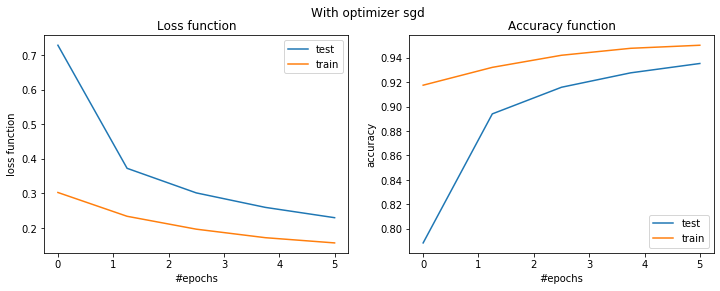

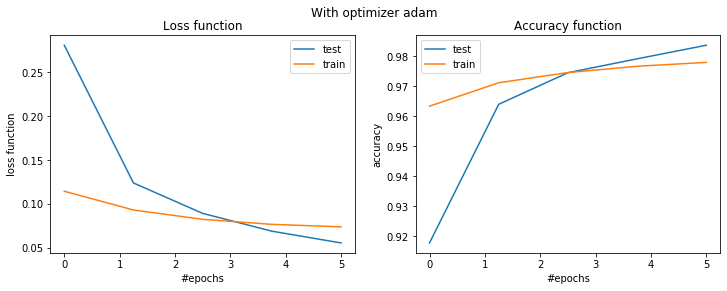

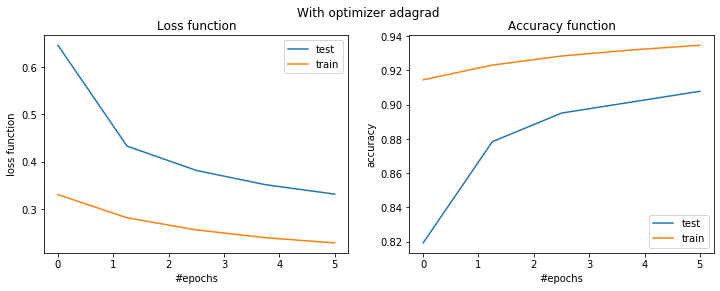

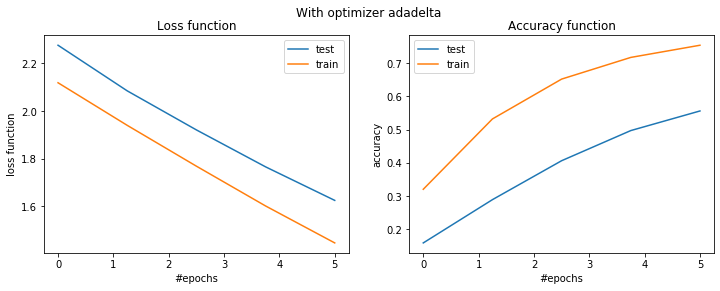

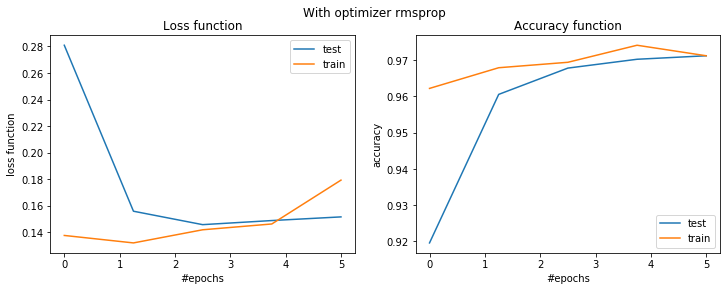

In [134]:
loss = np.zeros((2,5))
acc = np.zeros((2,5))
name = ['test','train']
path = 'Optimizer'
x = np.linspace(0,5,5)
for i in range(5):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    for j in range(2):
        loss[j,:] = np.loadtxt(os.path.join(path, f'loss_{opt[i]}.dat'),usecols=(j), unpack=True)
        acc[j,:] = np.loadtxt(os.path.join(path, f'accuracy_{opt[i]}.dat'), usecols=(j), unpack=True)
        ax[0].plot(x,loss[j,:], label = f'{name[j]}')
        ax[1].plot(x,acc[j,:], label = f'{name[j]}')
    ax[0].set_xlabel('#epochs')
    ax[0].set_ylabel('loss function')
    ax[0].set_title('Loss function')
    ax[0].legend()
    ax[1].set_xlabel('#epochs')
    ax[1].set_ylabel('accuracy')
    ax[1].set_title('Accuracy function')
    ax[1].legend()
    fig.suptitle(f'With optimizer {opt[i]}')


By looking at the prediction made by the different model we can see that none of the model recognize perfectly all the digits. For the minimum value of the loss function the optimizer *adam* it's the best one. 

With optimizer sgd
**************************
Test loss: 0.1571756899356842
Test accuracy: 0.9502000212669373
**************************


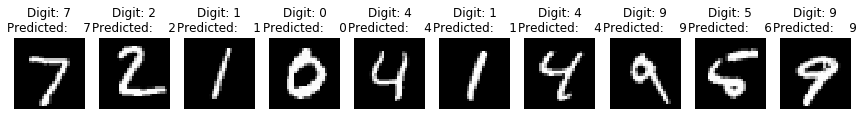

With optimizer adam
**************************
Test loss: 0.07373073697090149
Test accuracy: 0.9779999852180481
**************************


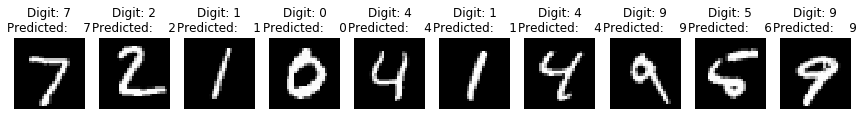

With optimizer adagrad
**************************
Test loss: 0.22876133024692535
Test accuracy: 0.9347000122070312
**************************


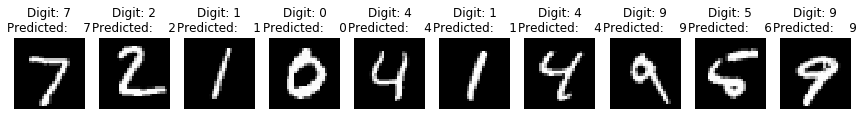

With optimizer adadelta
**************************
Test loss: 1.4465270042419434
Test accuracy: 0.753600001335144
**************************


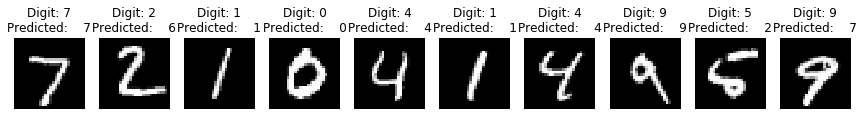

With optimizer rmsprop
**************************
Test loss: 0.17920637130737305
Test accuracy: 0.9711999893188477
**************************


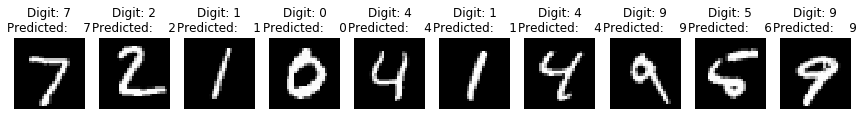

In [135]:
for i in range(5):
    save_model_path=f'Saved/{opt[i]}'
    model_old = tf.keras.models.load_model(filepath=save_model_path) #per ricaricare modello

    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    score = model_old.evaluate(X_test, Y_test, verbose=0)
    print(f'With optimizer {opt[i]}')
    print('**************************')
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('**************************')
    
    predictions = model_old.predict(X_test)

    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 

    plt.show()

## Esercizio 12.2

In this second exercise the request was to change the architecture of your DNN using convolutional layers (CNN). 

The architecture of CNN has to be composed of convolution layers, which used a serie of filters to compute the convolution of the input, and pooling layers, which coarse-grain the input maintaining locality and spatial structure. This procedures makes the CNN an approach ideal for the classification of images because it tries to reach translation invariance. 

The architecture for the CNN that I used is the following: 

- Convolution: 6 filters of 5x5 with $s=1$ (dimension of image: $28x28x1 \rightarrow 24x24x6$)
- MaxPooling: a filter of 2x2 with $s=2$ ($24x24x10 \rightarrow 12x12x10$)
- Convolution: 16 filters of 5x5 with $s=1$ ($12x12x10 \rightarrow 8x8x18$)
- MaxPooling: a filter of 2x2 with $s=2$ ($8x8x18 \rightarrow 4x4x18$)
- Flatten: unroll the 3D parameters $\rightarrow 4x4x18=288$
- Dense: fully connected 300 layers with activation function='relu'
- Dense: connected 80 layers with activation function='relu'
- Dropout: 0.5 of neurons to reduce risk of overfitting
- output: 10 digits with activation function='softmax'.
 
We can see that with this model the digit $5$ is recognized, even with a number of epochs equal to $5$. 

In [149]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [150]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Conv2D(6, kernel_size=(5, 5),activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
                     #strides?= how far the pooling window moves. if none, default is pool_size
                     #padding?
    model.add(Conv2D(16, kernel_size=(5, 5),activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(300,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(80, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    #compile model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

print('Model architecture created and compiled successfully! Ready to be trained.')

Model architecture created and compiled successfully! Ready to be trained.


In [151]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2601 - accuracy: 0.9209 - val_loss: 0.0678 - val_accuracy: 0.9783
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0821 - accuracy: 0.9779 - val_loss: 0.0502 - val_accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0585 - accuracy: 0.9834 - val_loss: 0.0408 - val_accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0469 - accuracy: 0.9866 - val_loss: 0.0444 - val_accuracy: 0.9869
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9872

Test loss: 0.042968690395355225
Test accuracy: 0.9872000217437744


Text(0.5, 1.0, 'Loss function')

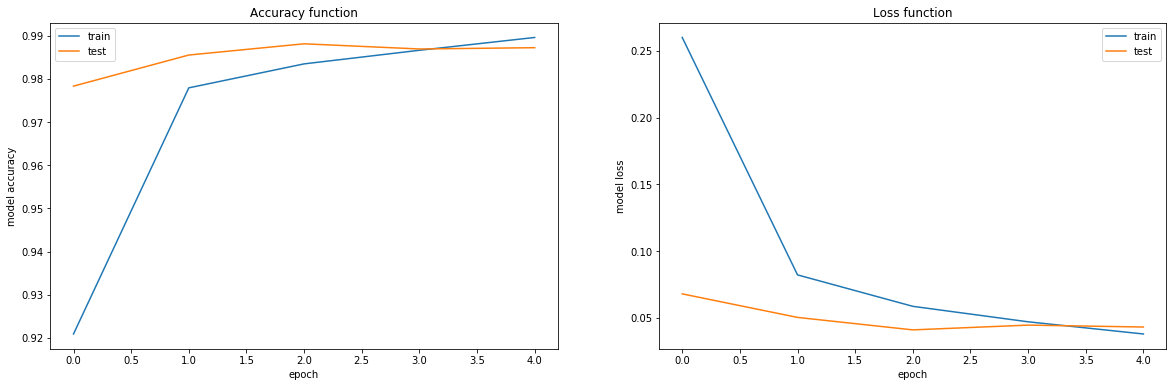

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_ylabel('model accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='best')
ax[0].set_title('Accuracy function')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='best')
ax[1].set_title('Loss function')

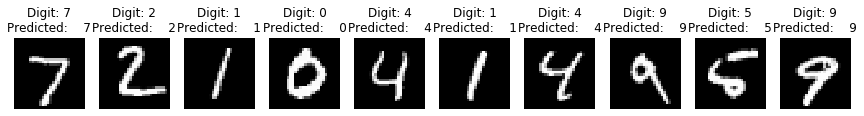

In [153]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Exercise 12.03

The last exercise consisted in verifying if the CNN created in the previous exercise can recognized another set of digits handwritten by myself. The answer is positive, as we can see below. 

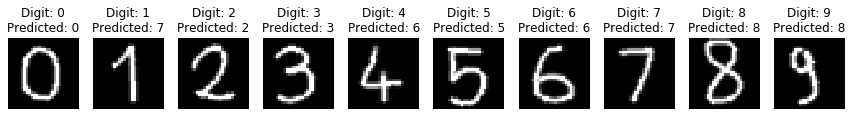

In [154]:
from PIL import Image
    
plt.figure(figsize=(15,15))

for d in range(10): 
    digit_filename = f"./Pictures/{d}.png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    ax = plt.subplot(3, 10, d + 1) 
    plt.imshow(data, cmap='gray')
    data = data.reshape(1, img_rows, img_cols, 1)
    prediction=model_CNN.predict(data)
    plt.title("Digit: "+str(d)+"\nPredicted: "+str(np.argmax(prediction)))   
    plt.axis('off') 
plt.show()

